In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [4]:
glove_file = datapath('/home/isleof/Development/cs224n/glove/glove.6B/glove.6B.300d.txt')
word2vec_glove_file = get_tmpfile('glove.6B.300d.txt')
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 300)

In [5]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [6]:
model.most_similar('obama')

[('barack', 0.9254721999168396),
 ('mccain', 0.7590768337249756),
 ('bush', 0.7570987343788147),
 ('clinton', 0.7085603475570679),
 ('hillary', 0.6497915983200073),
 ('kerry', 0.6144052147865295),
 ('rodham', 0.6138635277748108),
 ('biden', 0.5940852165222168),
 ('gore', 0.5885976552963257),
 ('democrats', 0.5608304738998413)]

In [7]:
model.most_similar('banana')

[('bananas', 0.6691169738769531),
 ('mango', 0.5804104804992676),
 ('pineapple', 0.5492371916770935),
 ('coconut', 0.5462779402732849),
 ('papaya', 0.5410568118095398),
 ('fruit', 0.52181077003479),
 ('growers', 0.4877639412879944),
 ('nut', 0.4839959740638733),
 ('peanut', 0.48062020540237427),
 ('potato', 0.48061180114746094)]

In [8]:
model.most_similar(negative='banana')

[('keyrates', 0.6847262978553772),
 ('rw97', 0.659587025642395),
 ('+9.00', 0.6340476274490356),
 ('ryryryryryry', 0.6322760581970215),
 ('zety', 0.5784541368484497),
 ('.0342', 0.5776804685592651),
 ('k586-1', 0.5598778128623962),
 ('cw96', 0.5540916323661804),
 ('mongkolporn', 0.5488854646682739),
 ('purva.patel@chron.com', 0.5483731031417847)]

In [12]:
model.most_similar(positive=['woman', 'king'], negative=['man'])[0]

('queen', 0.6713277101516724)

In [15]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[x2, y1], negative=[x1])
    return result[0][0]

In [16]:
analogy('japan', 'japanese', 'australia')

'australian'

In [17]:
analogy('obama', 'clinton', 'reagan')

'ronald'

In [22]:
model.doesnt_match('breakfast cereal dinner lunch'.split())

'cereal'

In [26]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [word for word in model.vocab]
            
    word_vectors = np.array([model[w] for w in words])
    
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolor='k', c='r')
    for word, (x, y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

<IPython.core.display.Javascript object>


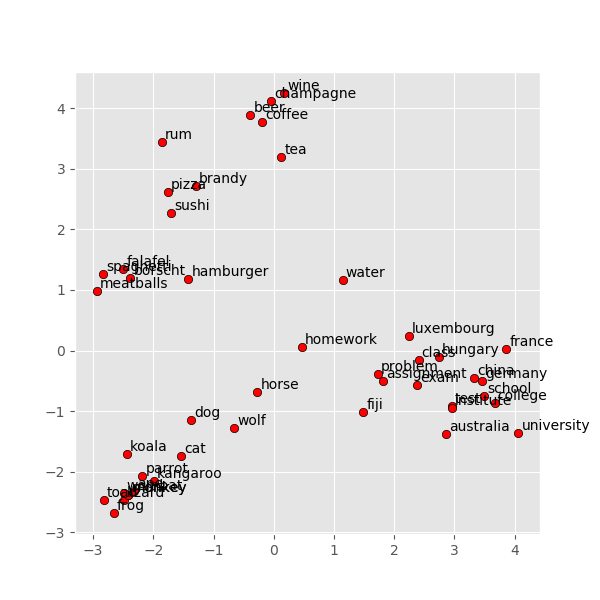

In [28]:
words = ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
         'school', 'college', 'university', 'institute']
display_pca_scatterplot(model, words)

<IPython.core.display.Javascript object>


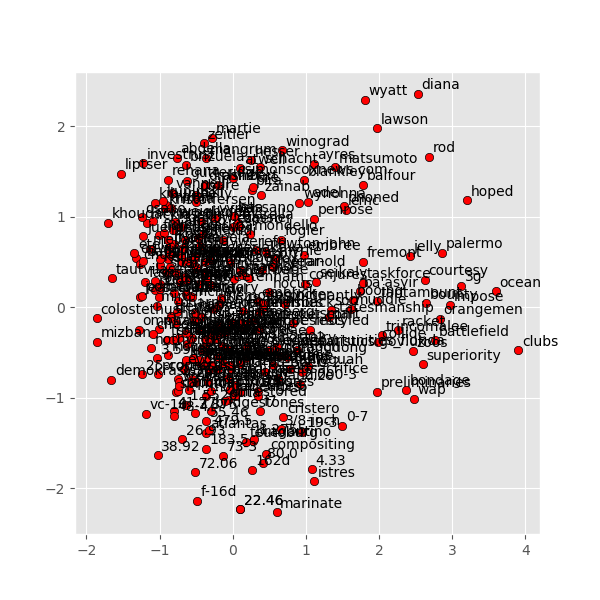

In [29]:
display_pca_scatterplot(model, sample=300)